In [1]:
import pandas as pd

In [31]:
df = pd.read_csv('creditcard.csv')

In [32]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [34]:
len(df[df['Class']==0])

284315

In [35]:
len(df[df['Class']==1])

492

In [36]:
len(df[df['Class']==1])/len(df[df['Class']==0])

0.0017304750013189597

In [37]:
min(df.Amount), max(df.Amount)

(0.0, 25691.16)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()

In [43]:
amount = df.Amount.values

In [44]:
max(amount)

25691.16

In [47]:
df['Amount'] = sc.fit_transform(amount.reshape(-1,1))

In [48]:
min(df.Amount), max(df.Amount)

(-0.3532293929668236, 102.36224270928423)

In [49]:
import seaborn as sns

In [50]:
from matplotlib import pyplot as plt

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

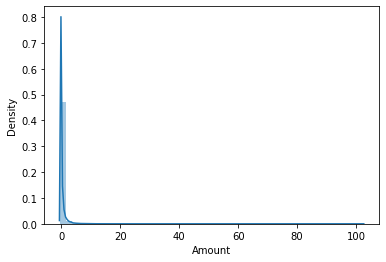

In [52]:
sns.distplot(df['Amount'])

In [53]:
df.drop(['Time'], axis=1, inplace=True)

In [55]:
df.drop_duplicates(inplace=True)

In [56]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [61]:
from sklearn.tree import DecisionTreeClassifier 

In [62]:
DT = DecisionTreeClassifier()

In [63]:
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
y_pred = DT.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_test, y_pred)

0.9989552498694062

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(y_test, y_pred)

array([[68758,    30],
       [   42,    86]], dtype=int64)

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
RF = RandomForestClassifier()

In [71]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
y_pred = RF.predict(X_test)

In [73]:
accuracy_score(y_test, y_pred)

0.9994195832607813

In [74]:
confusion_matrix(y_test, y_pred)

array([[68783,     5],
       [   35,    93]], dtype=int64)

In [83]:
f1_score(y_test, y_pred)

0.8230088495575221

In [75]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [76]:
pip install xgboost

In [77]:
from xgboost import XGBClassifier

In [78]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:07:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [79]:
accuracy_score(y_test, y_pred)

0.9994195832607813

In [80]:
confusion_matrix(y_test, y_pred)

array([[68783,     5],
       [   35,    93]], dtype=int64)

In [81]:
from sklearn.metrics import f1_score

In [82]:
f1_score(y_test, y_pred)

0.8230088495575221